In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
import plotly.graph_objs as go
import plotly.subplots as sp
import plotly.express as px
drive.mount('/content/drive')

Mounted at /content/drive


## 1) Read the Dataset

In [ ]:
sales = pd.read_csv('/content/drive/MyDrive/Project/US Adidas Sales/Dataset/adidas_sales_new.csv')

In [ ]:
sales.head(n = 5)

,Retailer,Retailer ID,Invoice Date,Year,Month,Day,Region,State,City,Sales Method,Gender,Product,Price per Unit,Units Sold,Total Sales,Operating Margin,Operating Profit
0,Foot Locker,1185732,2020-01-01,2020,1,1,Northeast,New York,New York,In-store,Men,Street Footwear,50.0,1200,600000,50,300000
1,Foot Locker,1185732,2020-01-02,2020,1,2,Northeast,New York,New York,In-store,Men,Athletic Footwear,50.0,1000,500000,30,150000
2,Foot Locker,1185732,2020-01-03,2020,1,3,Northeast,New York,New York,In-store,Women,Street Footwear,40.0,1000,400000,35,140000
3,Foot Locker,1185732,2020-01-04,2020,1,4,Northeast,New York,New York,In-store,Women,Athletic Footwear,45.0,850,382500,35,133875
4,Foot Locker,1185732,2020-01-05,2020,1,5,Northeast,New York,New York,In-store,Men,Apparel,60.0,900,540000,30,162000


In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Retailer          9648 non-null   object 
 1   Retailer ID       9648 non-null   int64  
 2   Invoice Date      9648 non-null   object 
 3   Year              9648 non-null   int64  
 4   Month             9648 non-null   int64  
 5   Day               9648 non-null   int64  
 6   Region            9648 non-null   object 
 7   State             9648 non-null   object 
 8   City              9648 non-null   object 
 9   Sales Method      9648 non-null   object 
 10  Gender            9648 non-null   object 
 11  Product           9648 non-null   object 
 12  Price per Unit    9648 non-null   float64
 13  Units Sold        9648 non-null   int64  
 14  Total Sales       9648 non-null   int64  
 15  Operating Margin  9648 non-null   int64  
 16  Operating Profit  9648 non-null   int64  


## 2) What is the monthly variation of sales in each product by gender in 2020 and 2021?

Getter function to create the pivotable

In [ ]:
def prepreprocess_pivotable(sales,year):
  # filter data for year 2020
  sales_year = sales[sales['Year'] == year]

  # group by month, gender, and product and calculate total sales
  sales_by_month_gender_product = sales_year.groupby(['Month', 'Gender', 'Product'])['Units Sold'].sum().reset_index()
  
  # pivot the data to create separate columns for each product
  # Convert into tidyverse format
  pivot_table_year = pd.pivot_table(sales_by_month_gender_product,
                              index=['Month', 'Gender'],
                              columns='Product', values='Units Sold').reset_index()

  # rename the columns to remove the 'Product' prefix
  pivot_table_year.columns.name = None
  pivot_table_year.columns = ['Month', 'Gender', 'Apparel', 'Athletic Footwear',
                        'Street Footwear']

  # Return the pivotable
  return pivot_table_year


Getter function for unit table sold

In [ ]:
def Unit_product_sold(pivot_table,year):
  # create separate dataframes for male and female sales
  male_sales = pivot_table[pivot_table['Gender'] == 'Men']
  female_sales = pivot_table[pivot_table['Gender'] == 'Women']

  # create subplots
  fig = sp.make_subplots(rows=2, cols=1,
                         subplot_titles=('Male Units Sold by Product in {}'.format(year),
                                       'Female Units Sold by Product in {}'.format(year)),
                         specs = [[{}],[{}]],
                         vertical_spacing = 0.10)

  # add traces for male sales
  for col in male_sales.columns[2:]:
      fig.add_trace(go.Scatter(x=male_sales['Month'],
                              y=male_sales[col],
                              mode='lines', name=col,
                              legendgroup = '1',
                              hovertemplate = '<b>Product</b>: %{text}<br>'+
                              '<b>Month</b>: %{x} <br>' +
                              '<b>Units Sold</b>: %{y}<extra></extra>',
                              text = ['{}'.format(col) for i in range(12)]),
                              row=1, col=1)

  # add traces for female sales
  for col in female_sales.columns[2:]:
      fig.add_trace(go.Scatter(x=female_sales['Month'],
                              y=female_sales[col],
                              mode='lines', name=col,
                              legendgroup = '2',
                              hovertemplate = '<b>Product</b>: %{text}<br>'+
                              '<b>Month</b>: %{x} <br>' +
                              '<b>Units Sold</b>: %{y}<extra></extra>',
                              text = ['{}'.format(col) for i in range(12)]),
                              row=2, col=1)

  # update layout
  fig.update_layout(title={
                          'text': 'Adidas Sales by Gender and Product {}'.format(year),
                          'x': 0.5,
                          'font': {'size': 24}},
                    height=1000, 
                    width=800,
                    xaxis1_title='Month',
                    yaxis1_title='Units Sold',
                    xaxis1=dict(tickmode='array',
                              tickvals=np.arange(1, 13),
                              ticktext=np.arange(1, 13)),
                    xaxis2_title='Month',
                    yaxis2_title='Units Sold',
                    xaxis2=dict(tickmode='array',
                              tickvals=np.arange(1, 13),
                              ticktext=np.arange(1, 13)),
                    legend_tracegroupgap = 400,
                    hoverlabel=dict(bgcolor = "white",
                                    font_size = 14,
                                    font_family = "Helvetica")                          
  )


  # show the plot
  fig.show()

#### 2020

In [ ]:
pivot_table_2020 = prepreprocess_pivotable(sales,2020)

In [ ]:
Unit_product_sold(pivot_table_2020,2020)

#### 2021

In [ ]:
pivot_table_2021 = prepreprocess_pivotable(sales,2021)

In [ ]:
Unit_product_sold(pivot_table_2021,2021)

Dataframe preprocessing steps to address question 2, 3 and 4

In [ ]:
def prepreprocess_table(sales,year,interest):
  # filter data for year 2020
  sales_year = sales[sales['Year'] == year]

  # group by interest and calculate total sales
  sales_by_interest_product = sales_year.groupby(interest)['Units Sold'].sum().reset_index()
  
  # Return the dataframe
  return sales_by_interest_product

Time series plotly getter function to address question 2, 3 and 4

In [ ]:
def plot_time_series(sales_by_interest_product, year, interest, outcome):
  fig = px.line(sales_by_interest_product,
                x="Month",
                y=outcome,
                color=interest,
                title="Adidas Sales by {} in {}".format(interest,year))
  fig.update_traces(mode="markers+lines", hovertemplate=None)
  fig.update_layout(hovermode="x",
                    xaxis_title='Month',
                    yaxis_title='Units Sold',
                    xaxis=dict(tickmode='array',
                              tickvals=np.arange(1, 13),
                              ticktext=np.arange(1, 13)),
                    autosize = False,
                    width = 1000,
                    height = 500)
  fig.show()

Pie chart plotly getter function to address question 2,3 and 4

In [ ]:
def plot_pie_chart(sales_by_interest_product, year, interest, outcome):
  # group by Month and calculate total unit product sales
  new_sales_by_interest_product = sales_by_interest_product.groupby(interest)['Units Sold'].sum().reset_index()
  
  fig = px.pie(new_sales_by_interest_product, values = outcome,
               names = interest,
               title = "Market Share of US Adidas Sales by {} in {}".format(interest,year),
               hover_data = [outcome])
  fig.update_traces(textposition='inside', textinfo='percent+label')
  fig.update_layout(
    autosize=False,
    width=1000,
    height=500,)
  fig.show()
  

## 2) How does the Adidas Sales differ by retailers?

2020

In [ ]:
q2_dat_2020 = prepreprocess_table(sales, 2020, ['Month', 'Retailer'])

In [ ]:
q2_dat_2020.head(n = 5)

,Month,Retailer,Units Sold
0,1,Foot Locker,30275
1,1,West Gear,18058
2,2,Foot Locker,14712
3,2,West Gear,23134
4,3,Foot Locker,27650


In [ ]:
plot_time_series(q2_dat_2020, 2020, "Retailer", "Units Sold")

In [ ]:
plot_pie_chart(q2_dat_2020, 2020, "Retailer", "Units Sold")

2021

In [ ]:
q2_dat_2021 = prepreprocess_table(sales, 2021, ['Month', 'Retailer'])

In [ ]:
q2_dat_2021.head(n = 5)

,Month,Retailer,Units Sold
0,1,Amazon,13006
1,1,Foot Locker,40384
2,1,Kohl's,29841
3,1,Sports Direct,28070
4,1,West Gear,67998


In [ ]:
plot_time_series(q2_dat_2021, 2021, "Retailer", "Units Sold")

In [ ]:
plot_pie_chart(q2_dat_2021, 2021, "Retailer", "Units Sold")

## 3) How does the Adidas Sales differ by Sales Method?

2020

In [ ]:
q3_dat_2020 = prepreprocess_table(sales, 2020, ['Month', 'Sales Method'])

In [ ]:
q3_dat_2020.head(n = 5)

,Month,Sales Method,Units Sold
0,1,In-store,7200
1,1,Online,8237
2,1,Outlet,32896
3,2,In-store,9950
4,2,Online,6531


In [ ]:
plot_time_series(q3_dat_2020, 2020, "Sales Method", "Units Sold")

In [ ]:
plot_pie_chart(q3_dat_2020, 2020, "Sales Method", "Units Sold")

2021

In [ ]:
q3_dat_2021 = prepreprocess_table(sales, 2021, ['Month', 'Sales Method'])

In [ ]:
q3_dat_2021.head(n = 5)

,Month,Sales Method,Units Sold
0,1,In-store,41150
1,1,Online,71780
2,1,Outlet,66369
3,2,In-store,39575
4,2,Online,65143


In [ ]:
plot_time_series(q3_dat_2021, 2021, "Sales Method", "Units Sold")

In [ ]:
plot_pie_chart(q3_dat_2021, 2021, "Sales Method", "Units Sold")

## 4) How does the Adidas sales differ by regions?

2020

In [ ]:
q4_dat_2020 = prepreprocess_table(sales, 2020, ['Month', 'Region'])

In [ ]:
q4_dat_2020.head(n = 5)

,Month,Region,Units Sold
0,1,Northeast,32891
1,1,West,15442
2,2,Northeast,14712
3,2,West,23134
4,3,Northeast,27650


In [ ]:
plot_time_series(q4_dat_2020, 2020, "Region", "Units Sold")

In [ ]:
plot_pie_chart(q4_dat_2020, 2020, "Region", "Units Sold")

2021

In [ ]:
q4_dat_2021 = prepreprocess_table(sales, 2021, ['Month', 'Region'])

In [ ]:
q4_dat_2021.head(n = 5)

,Month,Region,Units Sold
0,1,Midwest,37230
1,1,Northeast,27868
2,1,South,16035
3,1,Southeast,32996
4,1,West,65170


In [ ]:
plot_time_series(q4_dat_2021, 2021, "Region", "Units Sold")

In [ ]:
plot_pie_chart(q4_dat_2021, 2021, "Region", "Units Sold")

## 5) What is the distribution of Adidas Operating Margin by Retailer each year?

Data preprocessing

In [ ]:
def prepreprocess_table_q5(sales,year,interest):
  # filter data for year 2020
  sales_year = sales[sales['Year'] == year]

  # group by interest and calculate total sales
  sales_by_interest_product = sales_year.groupby(interest).size().reset_index(name='count')

  # Return the dataframe
  return sales_by_interest_product

In [ ]:
def plot_histogram(sales_df, year, x_0, interest, outcome):
  # create histogram with color as Retailer
  fig = px.histogram(sales_df, x=x_0,
                    y=outcome, color=interest,
                    title="Operating Margin Distribution by retailers in {}".format(year), 
                    nbins=30 # set the number of bins to 30
                    )
  # update the x-axis range and tick values
  fig.update_layout(xaxis_range=[10, 80], xaxis_dtick=5)

  # set the layout
  fig.update_layout(autosize=False, width=1000, height=500,
                    xaxis_title="Operating Margin",
                    yaxis_title="Count",
                    legend_title="Retailer")

  # show the plot
  fig.show()

2020

In [ ]:
q5_data_2020 = prepreprocess_table_q5(sales,2020,['Retailer', 'Operating Margin'])

In [ ]:
q5_data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          165 non-null    object
 1   Operating Margin  165 non-null    int64 
 2   count             165 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.0+ KB


In [ ]:
q5_data_2020.head(n = 5)

,Retailer,Operating Margin,count
0,Foot Locker,25,10
1,Foot Locker,27,3
2,Foot Locker,29,2
3,Foot Locker,30,55
4,Foot Locker,32,4


In [ ]:
plot_histogram(q5_data_2020, 2020, "Operating Margin", "Retailer", "count")

2021

In [ ]:
q5_data_2021 = prepreprocess_table_q5(sales,2021,['Retailer', 'Operating Margin'])

In [ ]:
q5_data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          294 non-null    object
 1   Operating Margin  294 non-null    int64 
 2   count             294 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.0+ KB


In [ ]:
q5_data_2021.head(n = 5)

,Retailer,Operating Margin,count
0,Amazon,25,48
1,Amazon,27,1
2,Amazon,28,1
3,Amazon,29,2
4,Amazon,30,58


In [ ]:
plot_histogram(q5_data_2021, 2021, "Operating Margin", "Retailer", "count")

## 6) What is the distribution of Adidas's Profit by Retailers each year?

Preprocess for Q6

In [ ]:
def prepreprocess_table_q6(sales,year,interest):
  # filter data for year 2020
  sales_year = sales[sales['Year'] == year]

  # group by interest and calculate total sales
  sales_by_interest_product = sales_year.groupby(interest).size().reset_index(name='count')

  # create a list of bin edges
  bins = [0, 50000, 100000, 150000, 200000, float("inf")]

  # create a list of bin labels
  labels = ["0 - 50000", "50000-100000", "100000-150000", "150000-200000", "> 200000"]

  # use pandas' cut function to create the new column
  sales_by_interest_product["category"] = pd.cut(sales_by_interest_product["Operating Profit"], 
                                                 bins=bins, labels=labels)
  grouped_df = sales_by_interest_product.groupby(['Retailer', 'category'])['count'].sum().reset_index()
  grouped_df = grouped_df.rename(columns={'count': 'count_2'})

  # Return the dataframe
  return grouped_df

Histogram for Q6

In [ ]:
def plot_histogram_q6(sales_df, year, x_0, interest, outcome):
  # create histogram with color as Retailer
  fig = px.histogram(sales_df, x=x_0,
                    y=outcome, color=interest,
                    title="Operating Margin Distribution by retailers in {}".format(year), 
                    nbins=30 # set the number of bins to 30
                    )
  # set the layout
  fig.update_layout(autosize=False, width=1000, height=500,
                    xaxis_title="Operating Margin",
                    yaxis_title="Count",
                    legend_title="Retailer")

  # show the plot
  fig.show()

2020

In [ ]:
q6_data_2020 = prepreprocess_table_q6(sales,2020,['Retailer', 'Operating Profit'])

In [ ]:
q6_data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Retailer  25 non-null     object  
 1   category  25 non-null     category
 2   count_2   25 non-null     int64   
dtypes: category(1), int64(1), object(1)
memory usage: 765.0+ bytes


In [ ]:
q6_data_2020.head(n = 5)

,Retailer,category,count_2
0,Foot Locker,0 - 50000,247
1,Foot Locker,50000-100000,23
2,Foot Locker,100000-150000,28
3,Foot Locker,150000-200000,24
4,Foot Locker,> 200000,15


In [ ]:
plot_histogram_q6(q6_data_2020, 2020, "category", "Retailer", "count_2")

2021

In [ ]:
q6_data_2021 = prepreprocess_table_q6(sales,2021,['Retailer', 'Operating Profit'])

In [ ]:
q6_data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Retailer  30 non-null     object  
 1   category  30 non-null     category
 2   count_2   30 non-null     int64   
dtypes: category(1), int64(1), object(1)
memory usage: 850.0+ bytes


In [ ]:
q6_data_2021.head(n = 5)

,Retailer,category,count_2
0,Amazon,0 - 50000,731
1,Amazon,50000-100000,128
2,Amazon,100000-150000,65
3,Amazon,150000-200000,17
4,Amazon,> 200000,8


In [ ]:
plot_histogram_q6(q6_data_2021, 2021, "category", "Retailer", "count_2")

## 7) How does the Adidas Sales differ by States in USA?

Preprocessing the dataframe for q7

In [ ]:
us_cities = pd.read_csv('/content/drive/MyDrive/Project/US Adidas Sales/Dataset/uscities.csv')
us_cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30844 entries, 0 to 30843
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          30844 non-null  object 
 1   city_ascii    30844 non-null  object 
 2   state_id      30844 non-null  object 
 3   state_name    30844 non-null  object 
 4   county_fips   30844 non-null  int64  
 5   county_name   30844 non-null  object 
 6   lat           30844 non-null  float64
 7   lng           30844 non-null  float64
 8   population    30844 non-null  int64  
 9   density       30844 non-null  float64
 10  source        30844 non-null  object 
 11  military      30844 non-null  bool   
 12  incorporated  30844 non-null  bool   
 13  timezone      30844 non-null  object 
 14  ranking       30844 non-null  int64  
 15  zips          30842 non-null  object 
 16  id            30844 non-null  int64  
dtypes: bool(2), float64(3), int64(4), object(8)
memory usage: 3.6+ MB


In [ ]:
df_grouped = us_cities.groupby(['state_name', 'city','state_id']).agg({'lat': 'mean', 'lng': 'mean'}).reset_index()
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30784 entries, 0 to 30783
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   state_name  30784 non-null  object 
 1   city        30784 non-null  object 
 2   state_id    30784 non-null  object 
 3   lat         30784 non-null  float64
 4   lng         30784 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.2+ MB


Export the clean df_grouped dataset

In [ ]:
df_grouped.to_csv('/content/drive/MyDrive/Project/US Adidas Sales/Dataset/df_grouped.csv', index=False)

In [ ]:
df_grouped.head(n = 5)

,state_name,city,state_id,lat,lng
0,Alabama,Abanda,AL,33.0926,-85.5253
1,Alabama,Abbeville,AL,31.5664,-85.2528
2,Alabama,Adamsville,AL,33.6073,-86.9740
3,Alabama,Addison,AL,34.2017,-87.1765
4,Alabama,Akron,AL,32.8785,-87.7429


In [ ]:
def create_us_cities_dict(df):
  # create the dictionary
  d = {}
  for state in df['state_name'].unique():
      state_df = df[df['state_name'] == state]
      county_dict = {}
      for i, row in state_df.iterrows():
          county_dict[row['city']] = {'lat': row['lat'], 'lon': row['lng']}
      state_id = state_df.iloc[0]['state_id']
      d[state] = {'state_id': state_id, 'counties': county_dict} # Add the state id inside
  return d
us_cities_dict = create_us_cities_dict(df_grouped)

In [ ]:
#len(sales['State'].unique()) There are 50 states
#len(sales['City'].unique()) There are 52 cities

Getter function to generate the operating profit by states

In [ ]:
# dataframe for the operating profit
def preprocessing_q7_1(sales, year, us_cities_dict):
  sales_year = sales[sales["Year"]==year]
  sales_final = sales_year.groupby(["State"]).agg({"Operating Profit": "median"}).reset_index()
  for i, row in sales_final.iterrows():
    state_name = row["State"]
    state_id = us_cities_dict[state_name]["state_id"]
    sales_final.at[i,"state_id"] = state_id
  return sales_final


Getter function to generate the operating margin by cities

In [ ]:
# dataframe for the operating margin
def preprocessing_q7_2(sales, year, us_cities_dict):
  sales_year = sales[sales["Year"]==year]
  sales_final = sales_year.groupby(["State", "City"]).agg({"Operating Margin": "median"}).reset_index()

  # Add lat and lng columns
  latitudes = []
  longitudes = []
  for i, row in sales_final.iterrows():
    state = row["State"]
    city = row["City"]
    if state in us_cities_dict and city in us_cities_dict[state]['counties']:
      latitudes.append(us_cities_dict[state]['counties'][city]["lat"])
      longitudes.append(us_cities_dict[state]['counties'][city]["lon"])
    else:
      latitudes.append(None)
      longitudes.append(None)     
    
  sales_final["lat"] = latitudes
  sales_final["lng"] = longitudes   

  # Normalize Operating Margin column
  min_val = sales_final["Operating Margin"].min()
  max_val = sales_final["Operating Margin"].max()

  # Should be from min 0 to max 1
  sales_final["Operating Margin Normalized"] = (sales_final["Operating Margin"] - min_val) / (max_val - min_val)

  # Sort by Operating Margin Normalized from smallest to largest
  sales_final.sort_values(by=["Operating Margin Normalized"], inplace=True)  
  return sales_final

Getter function for creating the limits

In [ ]:
def create_limits(q7_data_year_2):
  # Stages should be like this
  # stages = [(0, 0.20), (0.20, 0.40), (0.40, 0.60), (0.60, 0.80), (0.80, 1.00)]  
  tuple1 = (0, len(q7_data_year_2[q7_data_year_2["Operating Margin Normalized"] < 0.20]))
  tuple2 = (tuple1[1], tuple1[1]+ len(q7_data_year_2[(q7_data_year_2["Operating Margin Normalized"] >= 0.20) &
                                            (q7_data_year_2["Operating Margin Normalized"] < 0.40)]))
  tuple3 = (tuple2[1], tuple2[1]+ len(q7_data_year_2[(q7_data_year_2["Operating Margin Normalized"] >= 0.40) &
                                            (q7_data_year_2["Operating Margin Normalized"] < 0.60)]))
  tuple4 = (tuple3[1], tuple3[1]+ len(q7_data_year_2[(q7_data_year_2["Operating Margin Normalized"] >= 0.60) &
                                            (q7_data_year_2["Operating Margin Normalized"] < 0.80)]))
  tuple5 = (tuple4[1], len(q7_data_year_2))
  limits_year = [tuple1, tuple2, tuple3, tuple4, tuple5]
  return limits_year

Getter function for the bubble and chloropeth plot

In [ ]:
def plot_geospatial(df, df1, year, limits_year):
  for col in df.columns:
    df[col] = df[col].astype(str)

  df['text'] = df['State'] + '<br>' + \
      'Median Profit: ' + df['Operating Profit']
  df1['text'] = df1['City'] + '<br>Median Operating Margin ' + \
    (df1["Operating Margin"]).astype(str)+'%'
  fig = go.Figure(data=go.Choropleth(
      locations=df['state_id'],
      z=df['Operating Profit'].astype(float),
      locationmode='USA-states',
      colorscale='Reds',
      autocolorscale=False,
      text=df['text'], # hover text
      marker_line_color='white', # line markers between states
      colorbar_title="USD",
      name = 'State'
  ))
  # limits = [(0, 30), (30, 40), (40, 42), (42, 45), (45, 55)]
  colors = ["royalblue", "crimson", "lightseagreen", "orange", "lightgrey"]
  # scale = 50
  legend_vals = ['0-20%', '20-40%', '40-60%', '60-80%', '80-100%']

  for i in range(len(limits_year)):
      lim = limits_year[i]
      df_sub = df1[lim[0]:lim[1]] # not working
      fig.add_trace(go.Scattergeo(
          locationmode = 'USA-states',
          lon = df_sub['lng'],
          lat = df_sub['lat'],
          text = df_sub['text'], # not working
          legendgroup = '{}'.format(i),
          marker = dict(
              size = df_sub['Operating Margin Normalized']*1000, # Amplify the bubbles
              color = colors[i],
              line_color='rgb(40,40,40)',
              line_width=0.5,
              sizemode = 'area'
          ),
          name = legend_vals[i]))

  fig.update_layout(autosize=False, width=800, height=500,
      title_text='Adidas Sales by State and City {}'.format(year),
      geo = dict(
          scope='usa',
          projection=go.layout.geo.Projection(type = 'albers usa'),
          showlakes=True, # lakes
          lakecolor='rgb(255, 255, 255)'),
      legend=dict(x=-0.10, y=0.5)
  )

  fig.show()

2020

In [ ]:
q7_data_2020_1 = preprocessing_q7_1(sales, 2020, us_cities_dict)
q7_data_2020_2 = preprocessing_q7_2(sales, 2020, us_cities_dict)

In [ ]:
q7_data_2020_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             9 non-null      object 
 1   Operating Profit  9 non-null      float64
 2   state_id          9 non-null      object 
dtypes: float64(1), object(2)
memory usage: 344.0+ bytes


In [ ]:
q7_data_2020_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 8 to 2
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   State                        9 non-null      object 
 1   City                         9 non-null      object 
 2   Operating Margin             9 non-null      float64
 3   lat                          9 non-null      float64
 4   lng                          9 non-null      float64
 5   Operating Margin Normalized  9 non-null      float64
dtypes: float64(4), object(2)
memory usage: 504.0+ bytes


In [ ]:
q7_data_2020_1.head(n = 5)

,State,Operating Profit,state_id
0,California,4682.0,CA
1,Colorado,15878.5,CO
2,Florida,11079.5,FL
3,Minnesota,3081.5,MN
4,Nevada,3597.5,NV


In [ ]:
q7_data_2020_2.head(n = 5)

,State,City,Operating Margin,lat,lng,Operating Margin Normalized
8,Washington,Seattle,31.0,47.6211,-122.3244,0.000000
0,California,San Francisco,35.0,37.7558,-122.4449,0.296296
5,New York,New York,37.0,40.6943,-73.9249,0.444444
4,Nevada,Las Vegas,40.0,36.2333,-115.2654,0.666667
6,Pennsylvania,Philadelphia,40.0,40.0077,-75.1339,0.666667


In [ ]:
summary_stats_2020 = q7_data_2020_2['Operating Margin'].describe()
print(summary_stats_2020)

count     9.000000
mean     39.333333
std       4.337338
min      31.000000
25%      37.000000
50%      40.000000
75%      41.500000
max      44.500000
Name: Operating Margin, dtype: float64


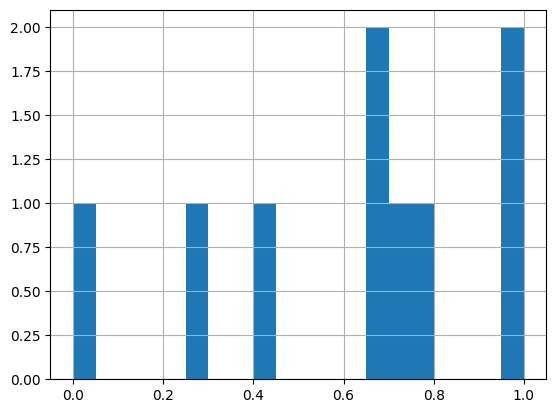

In [ ]:
# assuming the DataFrame is named 'df'
q7_data_2020_2['Operating Margin Normalized'].hist(bins=20)
plt.show()

Initialise the limit

In [ ]:
limit_2020 = create_limits(q7_data_2020_2)
limit_2020

[(0, 1), (1, 2), (2, 3), (3, 7), (7, 9)]

Plot the bubbles and chloropeth plots

In [ ]:
plot_geospatial(q7_data_2020_1,q7_data_2020_2, 2020, limit_2020)

2021

In [ ]:
q7_data_2021_1 = preprocessing_q7_1(sales, 2021, us_cities_dict)
q7_data_2021_2 = preprocessing_q7_2(sales, 2021, us_cities_dict)

In [ ]:
q7_data_2021_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             46 non-null     object 
 1   Operating Profit  46 non-null     float64
 2   state_id          46 non-null     object 
dtypes: float64(1), object(2)
memory usage: 1.2+ KB


In [ ]:
q7_data_2021_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 10 to 0
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   State                        47 non-null     object 
 1   City                         47 non-null     object 
 2   Operating Margin             47 non-null     float64
 3   lat                          47 non-null     float64
 4   lng                          47 non-null     float64
 5   Operating Margin Normalized  47 non-null     float64
dtypes: float64(4), object(2)
memory usage: 2.6+ KB


In [ ]:
q7_data_2021_1.head(n = 5)

,State,Operating Profit,state_id
0,Alabama,4906.5,AL
1,Alaska,9384.0,AK
2,Arizona,2685.5,AZ
3,Arkansas,2678.0,AR
4,California,4977.0,CA


In [ ]:
q7_data_2021_2.head(n = 5)

,State,City,Operating Margin,lat,lng,Operating Margin Normalized,text
10,Hawaii,Honolulu,30.0,21.3294,-157.8460,0.00,Honolulu<br>Median Operating Margin 30.0%
20,Massachusetts,Boston,34.0,42.3188,-71.0852,0.16,Boston<br>Median Operating Margin 34.0%
1,Alaska,Anchorage,35.0,61.1508,-149.1091,0.20,Anchorage<br>Median Operating Margin 35.0%
5,California,San Francisco,35.0,37.7558,-122.4449,0.20,San Francisco<br>Median Operating Margin 35.0%
8,Florida,Orlando,35.0,28.4773,-81.3370,0.20,Orlando<br>Median Operating Margin 35.0%


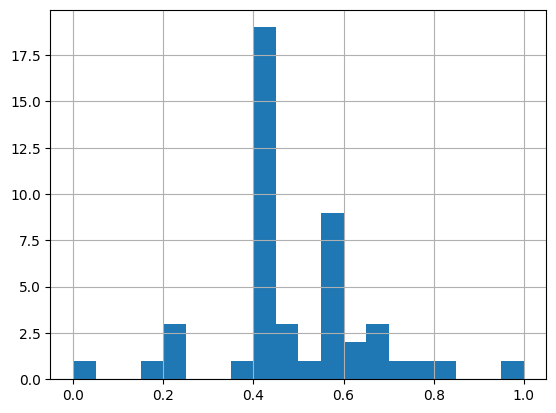

In [ ]:
# assuming the DataFrame is named 'df'
q7_data_2021_2['Operating Margin Normalized'].hist(bins=20)
plt.show()

In [ ]:
summary_stats_2021 = q7_data_2021_2['Operating Margin Normalized'].describe()
print(summary_stats_2021)

count    47.000000
mean      0.481277
std       0.179875
min       0.000000
25%       0.400000
50%       0.420000
75%       0.600000
max       1.000000
Name: Operating Margin Normalized, dtype: float64


Initialise the limits

In [ ]:
limits_2021 = create_limits(q7_data_2021_2)
limits_2021

[(0, 2), (2, 6), (6, 31), (31, 45), (45, 47)]

Create the Geospatial plot for 2021

In [ ]:
plot_geospatial(q7_data_2021_1,q7_data_2021_2, 2021, limits_2021)